# Introduction to ML Hackathon 1 
Metehan Pirim

### Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats

### Load and see data

In [2]:
train_csv_path = "train.csv"
test_csv_path = "test.csv"

data = pd.read_csv(train_csv_path)

print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14659 entries, 0 to 14658
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            14659 non-null  int64  
 1   Make                  14659 non-null  object 
 2   Model                 14659 non-null  object 
 3   Vehicle class         14659 non-null  object 
 4   Engine size (L)       14659 non-null  float64
 5   Cylinders             14659 non-null  int64  
 6   Transmission          14659 non-null  object 
 7   Fuel type             14659 non-null  object 
 8   City (L/100 km)       14659 non-null  float64
 9   Highway (L/100 km)    14659 non-null  float64
 10  Combined (L/100 km)   14659 non-null  float64
 11  Combined (mpg)        14659 non-null  int64  
 12  CO2 rating            5931 non-null   float64
 13  Smog rating           5109 non-null   float64
 14  CO2 emissions (g/km)  14659 non-null  int64  
dtypes: float64(6), int6

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 rating,Smog rating,CO2 emissions (g/km)
0,2019,Honda,Civic Coupe,Compact,1.5,4,AV7,X,7.8,6.4,7.2,39,8.0,3.0,167
1,2011,Hyundai,Genesis,Full-size,4.6,8,AS6,Z,14.0,9.5,12.0,24,NaN,NaN,276
2,2016,Kia,Sorento AWD,Sport utility vehicle: Small,2.4,4,AS6,X,11.4,9.2,10.4,27,5.0,NaN,245
3,2023,Volkswagen,Jetta Comfortline/Highline,Compact,1.5,4,AS8,X,8.1,5.8,7.1,40,6.0,7.0,167
4,2023,Land Rover,Defender 130 P400,Sport utility vehicle: Standard,3.0,6,AS8,Z,14.0,11.0,12.6,22,4.0,7.0,298


### Exploratory Data Analysis (EDA)

Missing Values:
 CO2 rating     8728
Smog rating    9550
dtype: int64

******************************


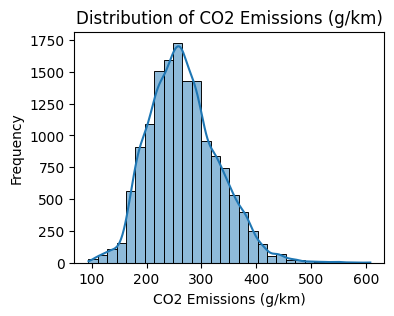

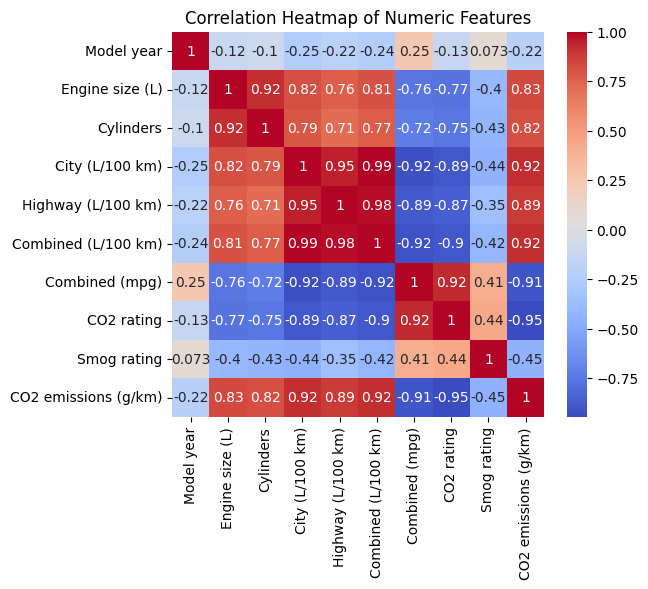

In [3]:
# check for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
print("\n******************************")

# visualize the distribution of the target variable
plt.figure(figsize=(4, 3))
sns.histplot(data['CO2 emissions (g/km)'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

# visualize the correlation of features
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(6, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')

plt.savefig('correlation_heatmap.png', dpi=500, bbox_inches='tight')

plt.show()


### Data cleaning

In [4]:
data_cleaned = data.drop(columns=["Make", "Model", "Vehicle class", "CO2 rating", "Smog rating"])

data_cleaned.head()

,Model year,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,2019,1.5,4,AV7,X,7.8,6.4,7.2,39,167
1,2011,4.6,8,AS6,Z,14.0,9.5,12.0,24,276
2,2016,2.4,4,AS6,X,11.4,9.2,10.4,27,245
3,2023,1.5,4,AS8,X,8.1,5.8,7.1,40,167
4,2023,3.0,6,AS8,Z,14.0,11.0,12.6,22,298


### Outlier removal

In [5]:
# outliers which are 3 standart dev. far away from the mean are eliminated

print("Shape before outlier removal:", data_cleaned.shape)

z_scores = np.abs(stats.zscore(data_cleaned.select_dtypes(include=[np.number])))
data_cleaned = data_cleaned[(z_scores < 3).all(axis=1)]

print("Shape after outlier removal:", data_cleaned.shape)

Shape before outlier removal: (14659, 10)
Shape after outlier removal: (13896, 10)


### Rare value handling

In [6]:
# rare values which we cannot learn enough about the relations or distribution of the data are removed for remaining categorical features
# they may also cause overfitting 
def filter_rare_values(df, column, min_count):
    value_counts = df[column].value_counts()
    values_to_keep = value_counts[value_counts >= min_count].index
    return df[df[column].isin(values_to_keep)]

for col in ["Transmission", "Fuel type"]:
    data_cleaned = filter_rare_values(data_cleaned, col, 3)
    

print("Unique transmission values:", data_cleaned["Transmission"].unique())
print("Unique fuel type values:", data_cleaned["Fuel type"].unique())

Unique transmission values: ['AV7' 'AS6' 'AS8' 'AS10' 'AS5' 'A4' 'M6' 'A6' 'A5' 'M5' 'M7' 'AM7' 'A9'
 'AV' 'AS9' 'AS7' 'AV8' 'A8' 'AS4' 'A7' 'A10' 'AV10' 'AM8' 'AV6' 'AM6'
 'AV1' 'AM9' 'AM5']
Unique fuel type values: ['X' 'Z' 'D' 'E']


### Encoding categorical features

In [7]:
# target encode transmission values which are consist of more than 4 category 
def target_encode(df, column, target):
    target_mean = df.groupby(column)[target].mean()
    return df[column].map(target_mean)

data_cleaned["Transmission_encoded"] = target_encode(data_cleaned, "Transmission", "CO2 emissions (g/km)")

# one-hot encode fuel type column, this operation will not increase number of features so much
data_encoded = pd.get_dummies(data_cleaned, columns=["Fuel type"], drop_first=True)

# we will use Transmission_encoded feature instead of unprocessed transmission feature
data_encoded = data_encoded.drop(columns=["Transmission"])

### Sepearate target feature

In [8]:
X = data_encoded.drop(columns=["CO2 emissions (g/km)"])
y = data_encoded["CO2 emissions (g/km)"].to_numpy().reshape(-1, 1)

### Feature engineering - polynomial features

In [9]:
# to catch complex relations too, to increase the power of linear regression
# selected small degree to avoid overfitting
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

### Feature scaling

In [10]:
# standardize to 0 mean, 1 standart dev.
scaler = StandardScaler()
X_poly_normalized = scaler.fit_transform(X_poly)

# bias term is added  
X_with_bias = np.hstack([np.ones((X_poly_normalized.shape[0], 1)), X_poly_normalized])

### Gradient descent implementation

In [11]:
# gradient descent with decreasing learning rate, to set steps smaller and provide more stable convergence 
def gradient_descent(X, y, theta, initial_lr, iterations, decay=0.95):
    m = len(y)
    learning_rate = initial_lr

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (learning_rate / m) * X.T.dot(errors)
        cost = (1 / (2 * m)) * np.sum(errors ** 2)

        learning_rate *= decay

        # just for watching progress of the process
        if i % 2000 == 0:
            print(f"Iteration {i}: Cost = {cost}, Learning Rate = {learning_rate:.6f}")

    return theta

### Model training

In [12]:
theta_final = gradient_descent(
    X_with_bias, y, np.zeros((X_with_bias.shape[1], 1)), initial_lr=0.01, iterations=20000, decay=0.99999999
)

# I trained the model with 2M iterations before submitting for competition, for the simplicity I'll use 20k for now

Iteration 0: Cost = 36443.08582841515, Learning Rate = 0.010000
Iteration 2000: Cost = 3.060088048225126, Learning Rate = 0.010000
Iteration 4000: Cost = 2.7898730041324815, Learning Rate = 0.010000
Iteration 6000: Cost = 2.630298468973618, Learning Rate = 0.009999
Iteration 8000: Cost = 2.519268183017761, Learning Rate = 0.009999
Iteration 10000: Cost = 2.4359329846825295, Learning Rate = 0.009999
Iteration 12000: Cost = 2.3700745359459634, Learning Rate = 0.009999
Iteration 14000: Cost = 2.3161467780159337, Learning Rate = 0.009999
Iteration 16000: Cost = 2.2709047099777693, Learning Rate = 0.009998
Iteration 18000: Cost = 2.2323108477482205, Learning Rate = 0.009998


### Loading and preprocessing of test data

In [13]:
# test data loading and same steps for preprocessing before making prediction
test_data = pd.read_csv(test_csv_path)
test_data_cleaned = test_data.drop(columns=["Make", "Model", "Vehicle class", "CO2 rating", "Smog rating"], errors='ignore')

# target encoding
test_data_cleaned["Transmission_encoded"] = test_data_cleaned["Transmission"].map(
    data_cleaned.groupby("Transmission")["CO2 emissions (g/km)"].mean()
)

# one-hot encoding
test_data_encoded = pd.get_dummies(test_data_cleaned, columns=["Fuel type"], drop_first=True)

missing_cols = set(X.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[X.columns]

### Feature engineering for test data

In [14]:
X_test_poly = poly.transform(test_data_encoded)

X_test_normalized = scaler.transform(X_test_poly)
X_test_with_bias = np.hstack([np.ones((X_test_normalized.shape[0], 1)), X_test_normalized])

### Predictions and submission

In [15]:
test_predictions = X_test_with_bias.dot(theta_final)

submission = pd.DataFrame({
    "ID": range(0, len(test_predictions)),
    "CO2 emissions (g/km)": test_predictions.flatten()
})

submission.to_csv("submission.csv", index=False)